In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download Dataset

In [2]:
!gdown 1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D

Downloading...
From: https://drive.google.com/uc?id=1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D
To: /content/used_cars.csv
100% 608k/608k [00:00<00:00, 20.5MB/s]


In [3]:
df = pd.read_csv("used_cars.csv")

# Preprocessing Dataset

## Read Infor

In [4]:
df.head()

brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  
0  At least 1 accident or damage reported         Yes  $10,300  
1  At least 1 accident or damage reported         Yes  $38,005  
2                           None reported         NaN  $54,598  
3                           None reported         Yes  $15,500  
4                           None reported         NaN  $34,999

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [6]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

## Feature Engineering

### Handle Missing Value

In [7]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
# clean_title has too much Nan values and its not really import to predict price, so we don't choos it
# We will drop all Nan sample for easily handle missing value
df_clean_nan = df.copy()
df_clean_nan = df_clean_nan.drop(columns=['clean_title'])
df_clean_nan = df_clean_nan.dropna()
df_clean_nan.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
dtype: int64

In [9]:
df_clean_nan.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')

### Choose Labels

In [10]:
y = df_clean_nan['price']

In [11]:
# Check for NaN values in 'y'
nan_y = y.isnull().sum()
print(f"Number of NaN values in 'y': {nan_y}")

Number of NaN values in 'y': 0


In [12]:
print(type(y[0]))

<class 'str'>


In [13]:
y.head()

0    $10,300
1    $38,005
2    $54,598
3    $15,500
4    $34,999
Name: price, dtype: object

In [14]:
for i in y.index:
    y.loc[i] = int(y.loc[i][1:].replace(',', ''))

Streaming output truncated to the last 5000 lines.
<ipython-input-14-879ac75c6df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[i] = int(y.loc[i][1:].replace(',', ''))
<ipython-input-14-879ac75c6df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[i] = int(y.loc[i][1:].replace(',', ''))
<ipython-input-14-879ac75c6df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[i] = int(y.loc[i][1:].replace(',', ''))
<ipytho

In [15]:
y.head()

0    10300
1    38005
2    54598
3    15500
4    34999
Name: price, dtype: object

In [16]:
print(type(y[0]))

<class 'int'>


### Choose Features

#### Understand meaning of data

In [17]:
# Convert model_year to car_age
CURRENT_YEAR = 2025
df_clean_nan['car_age'] = CURRENT_YEAR - df_clean_nan['model_year']

#### Handle Category Data

In [18]:
df_clean_nan.tail()

brand                 model  model_year      milage fuel_type  \
4003  Mercedes-Benz  E-Class E 300 4MATIC        2018  53,705 mi.  Gasoline   
4004        Bentley  Continental GT Speed        2023     714 mi.  Gasoline   
4005           Audi  S4 3.0T Premium Plus        2022  10,900 mi.  Gasoline   
4007           Ford          F-150 Raptor        2020  33,000 mi.  Gasoline   
4008            BMW          X3 xDrive30i        2020  43,000 mi.  Gasoline   

                                             engine  \
4003   241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
4004               6.0L W12 48V PDI DOHC Twin Turbo   
4005  349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4007  450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008   248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission ext_col  int_col  \
4003                                A/T   Black    Black   
4004  8-Speed Automatic with Auto-Shift   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode   Black    Black   
4007                                A/T    Blue    Black   
4008                                A/T    Gray    Brown   

                                    accident   price  car_age  
4003  At least 1 accident or damage reported   25900        7  
4004                           None reported  349950        2  
4005                           None reported   53900        3  
4007                           None reported   62999        5  
4008  At least 1 accident or damage reported   40000        5

In [19]:
# --- Handle 'milage': remove first char, commas, convert to int ---
df_clean_nan['milage'] = df_clean_nan['milage'].str[:-3]  # remove first char (e.g. '≈' or ' ')
df_clean_nan['milage'] = df_clean_nan['milage'].str.replace(',', '').astype(int)

In [20]:
# --- Handle 'engine': extract number before 'L' ---
df_clean_nan['engine'] = df_clean_nan['engine'].str.extract(r'(\d+\.\d+)L').astype(float) # Regular Expression

In [21]:
# --- Handle 'model', 'transmission', 'int_col', 'ext_col', 'fuel_type' using index-to-label ---
# Create index-to-label mappings for each column
for col in ['brand','model', 'transmission', 'int_col', 'ext_col', 'fuel_type']:
    unique_labels = sorted(df_clean_nan[col].dropna().unique())
    idx_to_label = {i: label for i, label in enumerate(unique_labels)}
    label_to_idx = {label: i for i, label in enumerate(unique_labels)}
    df_clean_nan[col] = df_clean_nan[col].map(label_to_idx)  # convert to index

In [22]:
df_clean_nan.head()

brand  model  model_year  milage  fuel_type  engine  transmission  ext_col  \
0     14   1647        2013   51000          1     3.7            13       29   
1     19   1107        2021   34742          2     3.8            29      179   
2     26   1243        2022   22372          2     NaN            37       38   
3     20   1163        2015   88900          3     3.5            20       29   
4      3   1148        2021    9835          2     2.0            29      117   

   int_col                                accident  price  car_age  
0       12  At least 1 accident or damage reported  10300       12  
1       66  At least 1 accident or damage reported  38005        4  
2       12                           None reported  54598        3  
3       12                           None reported  15500       10  
4       12                           None reported  34999        4

In [23]:
df_clean_nan = df_clean_nan.dropna()
df_clean_nan

brand  model  model_year  milage  fuel_type  engine  transmission  \
0        14   1647        2013   51000          1     3.7            13   
1        19   1107        2021   34742          2     3.8            29   
3        20   1163        2015   88900          3     3.5            20   
4         3   1148        2021    9835          2     2.0            29   
6         3   1374        2017   84000          2     2.0            13   
...     ...    ...         ...     ...        ...     ...           ...   
4003     34    531        2018   53705          2     2.0            35   
4004      5    468        2023     714          2     6.0            30   
4005      3   1378        2022   10900          2     3.0            55   
4007     14    640        2020   33000          2     3.5            35   
4008      4   1693        2020   43000          2     2.0            35   

      ext_col  int_col                                accident   price  \
0          29       12  At least 1 accident or damage reported   10300   
1         179       66  At least 1 accident or damage reported   38005   
3          29       12                           None reported   15500   
4         117       12                           None reported   34999   
6          38       12                           None reported   31000   
...       ...      ...                                     ...     ...   
4003       29       12  At least 1 accident or damage reported   25900   
4004       50       69                           None reported  349950   
4005       29       12                           None reported   53900   
4007       38       12                           None reported   62999   
4008      125       29  At least 1 accident or damage reported   40000   

      car_age  
0          12  
1           4  
3          10  
4           4  
6           8  
...       ...  
4003        7  
4004        2  
4005        3  
4007        5  
4008        5  

[3498 rows x 12 columns]

In [24]:
X = df_clean_nan[['brand','model', 'milage', 'transmission', 'engine', 'int_col', 'ext_col', 'fuel_type','car_age']]
y = df_clean_nan[['price']]

In [25]:
X.head()

brand  model  milage  transmission  engine  int_col  ext_col  fuel_type  \
0     14   1647   51000            13     3.7       12       29          1   
1     19   1107   34742            29     3.8       66      179          2   
3     20   1163   88900            20     3.5       12       29          3   
4      3   1148    9835            29     2.0       12      117          2   
6      3   1374   84000            13     2.0       12       38          2   

   car_age  
0       12  
1        4  
3       10  
4        4  
6        8

In [26]:
y.head()

price
0  10300
1  38005
3  15500
4  34999
6  31000

In [27]:
# Compute mean and std
milage_mean = np.mean(X['milage'])
milage_std = np.std(X['milage'])
# Normalize
milage = (X['milage'] - milage_mean) / milage_std
X['milage'] = milage

<ipython-input-27-6a68eed73c41>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['milage'] = milage


In [28]:
# Compute mean and std for 'model'
model_mean = np.mean(X['model'])
model_std = np.std(X['model'])

# Normalize 'model'
model = (X['model'] - model_mean) / model_std
X['model'] = model

<ipython-input-28-094e8476f081>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['model'] = model


In [29]:
# Compute mean and std for 'y'
y_mean = np.mean(y)
y_std = np.std(y)

# Normalize 'y'
y_normalized = (y - y_mean) / y_std
y = y_normalized

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


## Dataset split

In [30]:
TRAIN_RATIO = 0.8
split_index = int(TRAIN_RATIO * len(X))

In [31]:
x_train = X.iloc[:split_index].reset_index(drop=True)
y_train = y.iloc[:split_index].reset_index(drop=True)
x_test = X.iloc[split_index:].reset_index(drop=True)
y_test = y.iloc[split_index:].reset_index(drop=True)

In [32]:
x_train

brand     model    milage  transmission  engine  int_col  ext_col  \
0        14  1.489586 -0.330429            13     3.7       12       29   
1        19  0.452857 -0.638222            29     3.8       66      179   
2        20  0.560370  0.387087            20     3.5       12       29   
3         3  0.531571 -1.109757            29     2.0       12      117   
4         3  0.965462  0.294321            13     2.0       12       38   
...     ...       ...       ...           ...     ...      ...      ...   
2793     34 -1.048481 -0.164473            33     2.0       80      153   
2794     23  1.263042 -0.230090            35     3.3       12      253   
2795     50  0.996180  1.865661            17     2.5        9       29   
2796      9  1.182407  1.028307            35     6.0       12       48   
2797     25  0.850270 -0.173844            35     3.0       12       29   

      fuel_type  car_age  
0             1       12  
1             2        4  
2             3       10  
3             2        4  
4             2        8  
...         ...      ...  
2793          2        6  
2794          2        7  
2795          2       21  
2796          1       10  
2797          2        6  

[2798 rows x 9 columns]

In [33]:
train_example = list(zip(x_train.values, y_train.values.flatten()))
train_example

[(array([14.        ,  1.48958603, -0.33042877, 13.        ,  3.7       ,
         12.        , 29.        ,  1.        , 12.        ]),
  -0.400770631036794),
 (array([ 19.        ,   0.45285688,  -0.6382221 ,  29.        ,
           3.8       ,  66.        , 179.        ,   2.        ,
           4.        ]),
  -0.06306423151442862),
 (array([20.        ,  0.56036953,  0.38708675, 20.        ,  3.5       ,
         12.        , 29.        ,  3.        , 10.        ]),
  -0.3373859251166965),
 (array([  3.        ,   0.5315715 ,  -1.10975664,  29.        ,
           2.        ,  12.        , 117.        ,   2.        ,
           4.        ]),
  -0.09970546728285419),
 (array([ 3.        ,  0.96546185,  0.2943209 , 13.        ,  2.        ,
         12.        , 38.        ,  2.        ,  8.        ]),
  -0.14845074400871375),
 (array([  4.        ,  -1.4324543 ,   3.28554655,  35.        ,
           4.4       ,  68.        , 126.        ,   2.        ,
          24.        ]),
  

In [34]:
test_example = list(zip(x_test.values, y_test.values.flatten()))

# Training

In [35]:
# --- Add bias term to feature vector ---
def phi(x):
    return np.append(x, 1)  # x -> [x1, x2, ..., xn, 1]

# --- Initialize weight vector (with bias term) ---
def initialWeightVector():
    return np.zeros(X.shape[1] + 1)  # one extra for bias

# --- Mean Squared Error Loss ---
def trainloss(w):
    return (1.0 / len(train_example)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in train_example)

# --- Gradient of Loss ---
def gradientTrainloss(w):
    return (1.0 / len(train_example)) * sum(2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in train_example)

# --- Gradient Descent ---
def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_iters=2000, step=200):
    w = initialWeightVector()
    history = []

    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)

        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}")

        w = w_new

    return w, history

In [39]:
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=0.00001, max_iters=30000, step=100)

Epoch 0: Weight Vector = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], TrainLoss = 1.161975, Gradient Norm = 7.764358
Epoch 100: Weight Vector = [ 2.20659312e-04 -3.44508176e-05 -5.88070589e-04  3.38170595e-04
  4.49643279e-04  1.40395352e-03 -1.54213954e-04 -1.93701558e-05
 -2.27876492e-03 -2.01505372e-05], TrainLoss = 1.151963, Gradient Norm = 2.358473
Epoch 200: Weight Vector = [ 3.81529296e-04 -7.02630275e-05 -1.15757436e-03  5.45263029e-04
  8.98471585e-04  1.48098672e-03 -1.22312687e-04 -4.22680219e-05
 -4.40592690e-03 -4.12404144e-05], TrainLoss = 1.146832, Gradient Norm = 2.175335
Epoch 300: Weight Vector = [ 5.70714384e-04 -1.05967615e-04 -1.71104050e-03  7.54063436e-04
  1.36601724e-03  1.51944698e-03 -9.50537861e-05 -5.84616681e-05
 -6.34944933e-03 -5.81418956e-05], TrainLoss = 1.142445, Gradient Norm = 2.014478
Epoch 400: Weight Vector = [ 7.62668543e-04 -1.41466917e-04 -2.24979292e-03  9.46388217e-04
  1.84881254e-03  1.54998847e-03 -7.21549574e-05 -6.95276444e-05
 -8.12953026e-03 -7.1

# Visualize loss

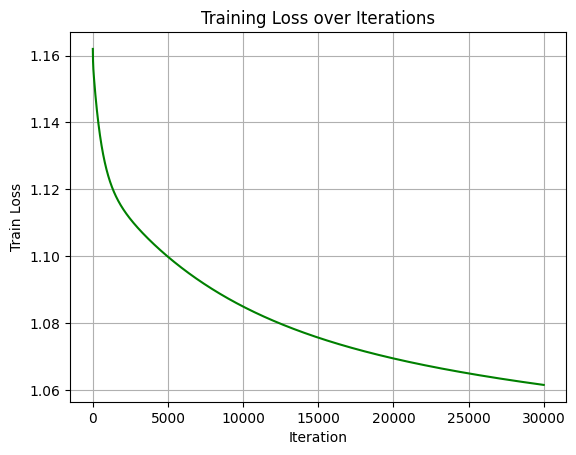

In [40]:
# Plot loss over iterations
plt.plot(loss_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Training Loss over Iterations')
plt.grid(True)
plt.show()

In [41]:
car_test = x_test.iloc[100].values
print(car_test)
real_price = y_test.iloc[100].values
# Access the numerical value within the Series using .item() or .iloc[0]
real_price_denormalized = real_price.item() * y_std.iloc[0] + y_mean
print(f"Real price: ${real_price_denormalized:.2f}")

[48.          1.34751574 -1.2009133  35.          3.5        66.
 29.          2.          3.        ]
Real price: $36500.00


In [42]:
# Predict
price = w[:-1] @ car_test + w[-1]
price_denormalized = price * y_std.iloc[0] + y_mean
print(f"Predicted price for a car is: ${price_denormalized:.2f}")

Predicted price for a car is: $74396.20
